In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/jhu/full_data.csv')

In [3]:
df.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
0,2021-06-19,2020 Summer Olympics athletes & staff,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,2021-06-20,2020 Summer Olympics athletes & staff,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,2021-06-21,2020 Summer Olympics athletes & staff,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,2021-06-22,2020 Summer Olympics athletes & staff,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,2021-06-23,2020 Summer Olympics athletes & staff,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(101859, 10)

In [5]:
df.columns

Index(['date', 'location', 'new_cases', 'new_deaths', 'total_cases',
       'total_deaths', 'weekly_cases', 'weekly_deaths', 'biweekly_cases',
       'biweekly_deaths'],
      dtype='object')

In [6]:
df.isnull().sum()

date                   0
location               0
new_cases             10
new_deaths         10229
total_cases            7
total_deaths       10384
weekly_cases        1025
weekly_deaths       1025
biweekly_cases      2439
biweekly_deaths     2439
dtype: int64

In [7]:
df.count()

date               101859
location           101859
new_cases          101849
new_deaths          91630
total_cases        101852
total_deaths        91475
weekly_cases       100834
weekly_deaths      100834
biweekly_cases      99420
biweekly_deaths     99420
dtype: int64

In [104]:
df = df.dropna()

In [46]:
df.groupby('location').sum().head(20)

,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
location,,,,,,,,
2020 Summer Olympics athletes & staff,198.0,0.0,1.560000e+03,0.0,983.0,0.0,1344.0,0.0
Afghanistan,146523.0,6677.0,2.408134e+07,965161.0,1014237.0,45575.0,2002865.0,88968.0
Africa,6673032.0,169216.0,1.238324e+09,31745758.0,45806826.0,1163362.0,89892112.0,2281365.0
Albania,133036.0,2457.0,2.798792e+07,528143.0,930448.0,17192.0,1859245.0,34374.0
Algeria,170189.0,4219.0,3.653570e+07,1066952.0,1157870.0,28873.0,2248373.0,56696.0
Andorra,14678.0,128.0,3.249567e+06,39975.0,102073.0,890.0,202691.0,1779.0
Angola,42646.0,1008.0,7.161711e+06,171809.0,294914.0,6962.0,582617.0,13737.0
Antigua and Barbuda,1303.0,43.0,2.224490e+05,6670.0,9009.0,301.0,17913.0,595.0
Argentina,4919408.0,105586.0,7.788546e+08,17883959.0,34137951.0,731283.0,67636164.0,1447844.0


Country having most number of deaths :
I found the Europe have the most number of deaths i.e. 259707161.0

In [47]:
df.groupby('location')['total_deaths'].sum().sort_values(ascending = False).head(2)

location
World     890426416.0
Europe    259707161.0
Name: total_deaths, dtype: float64

Country having least number of deaths: I found the 8 countries with least number of deaths i.e.2020 Summer Olympics athletes & staff  

1.  location
2020 Summer Olympics athletes & staff      0.0,
Kiribati                                   0.0,
Marshall Islands                           0.0,
Micronesia (country)                       0.0,
Samoa                                      0.0,
Solomon Islands                            0.0,
Dominica                                   0.0,
Vatican                                    0.0,




In [48]:
df.groupby('location')['total_deaths'].sum().sort_values(ascending = True).head(8)

location
2020 Summer Olympics athletes & staff    0.0
Kiribati                                 0.0
Marshall Islands                         0.0
Micronesia (country)                     0.0
Samoa                                    0.0
Solomon Islands                          0.0
Dominica                                 0.0
Vatican                                  0.0
Name: total_deaths, dtype: float64

Country having highest number of cases : I found the Europe have the most number of cases i.e. 1.027319e+10.

In [49]:
df.groupby('location')['total_cases'].sum().sort_values(ascending = False).head(2)

location
World     3.758027e+10
Europe    1.027319e+10
Name: total_cases, dtype: float64

Country having least number of cases: I found the Kiribati have the least number of cases i.e 145

In [50]:
df.groupby('location')['total_cases'].sum().sort_values(ascending = True).head(1)


location
Kiribati    145.0
Name: total_cases, dtype: float64

The total number of cases in India are 5101330295.0.


In [51]:
df[df.location == 'India']['total_cases'].sum()

5101330295.0

The total number of deaths in India are 68690310.0.

In [52]:
df[df.location == 'India']['total_deaths'].sum()

68690310.0

In [101]:
df.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
0,2021-06-19,2020 Summer Olympics athletes & staff,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,2021-06-20,2020 Summer Olympics athletes & staff,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,2021-06-21,2020 Summer Olympics athletes & staff,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,2021-06-22,2020 Summer Olympics athletes & staff,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,2021-06-23,2020 Summer Olympics athletes & staff,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [72]:
df.columns

Index(['date', 'location', 'new_cases', 'new_deaths', 'total_cases',
       'total_deaths', 'weekly_cases', 'weekly_deaths', 'biweekly_cases',
       'biweekly_deaths'],
      dtype='object')

In [105]:
df.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
69,2020-03-22,Afghanistan,4.0,1.0,34.0,1.0,18.0,1.0,29.0,1.0
70,2020-03-23,Afghanistan,7.0,0.0,41.0,1.0,23.0,1.0,34.0,1.0
71,2020-03-24,Afghanistan,2.0,0.0,43.0,1.0,23.0,1.0,35.0,1.0
72,2020-03-25,Afghanistan,33.0,1.0,76.0,2.0,52.0,2.0,65.0,2.0
73,2020-03-26,Afghanistan,4.0,1.0,80.0,3.0,55.0,3.0,68.0,3.0


FbProphet to forecast the number of cases for the next 30 days and
plotting the graph for the same.

In [108]:
df = df.rename(columns = {'date': 'ds', 'total_cases':'y'})

In [109]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [112]:
future = m.make_future_dataframe(periods = 30)
forecast = m.predict(future)
print(forecast.tail())

            ds         trend  ...  multiplicative_terms_upper          yhat
568 2021-08-25  3.488929e+06  ...                         0.0  3.488464e+06
569 2021-08-26  3.497465e+06  ...                         0.0  3.497427e+06
570 2021-08-27  3.506001e+06  ...                         0.0  3.506846e+06
571 2021-08-28  3.514537e+06  ...                         0.0  3.515878e+06
572 2021-08-29  3.523073e+06  ...                         0.0  3.523124e+06

[5 rows x 16 columns]


In [114]:
forecast = m.predict(future)
forecast[['ds']].tail()

,ds
568,2021-08-25
569,2021-08-26
570,2021-08-27
571,2021-08-28
572,2021-08-29


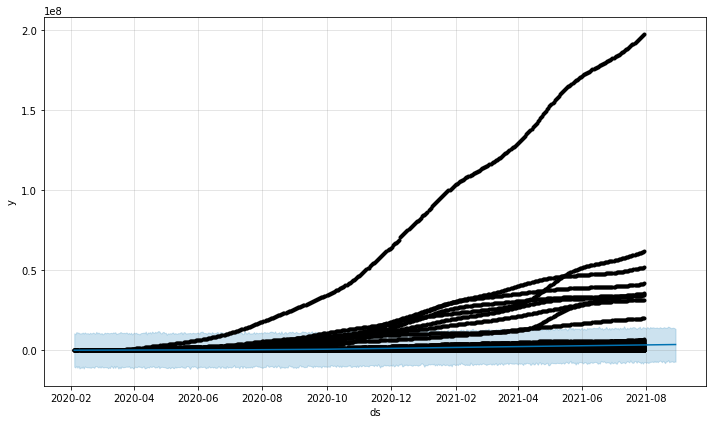

In [115]:
fig1 = m.plot(forecast)


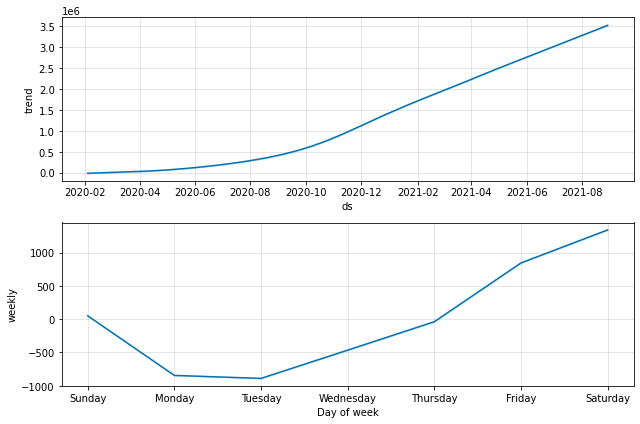

In [116]:
fig2 = m.plot_components(forecast)

Using Matplotlib/Seaborn to plot the monthly trend.

In [130]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [123]:
df.head()

,ds,location,new_cases,new_deaths,y,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
69,2020-03-22,Afghanistan,4.0,1.0,34.0,1.0,18.0,1.0,29.0,1.0
70,2020-03-23,Afghanistan,7.0,0.0,41.0,1.0,23.0,1.0,34.0,1.0
71,2020-03-24,Afghanistan,2.0,0.0,43.0,1.0,23.0,1.0,35.0,1.0
72,2020-03-25,Afghanistan,33.0,1.0,76.0,2.0,52.0,2.0,65.0,2.0
73,2020-03-26,Afghanistan,4.0,1.0,80.0,3.0,55.0,3.0,68.0,3.0


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


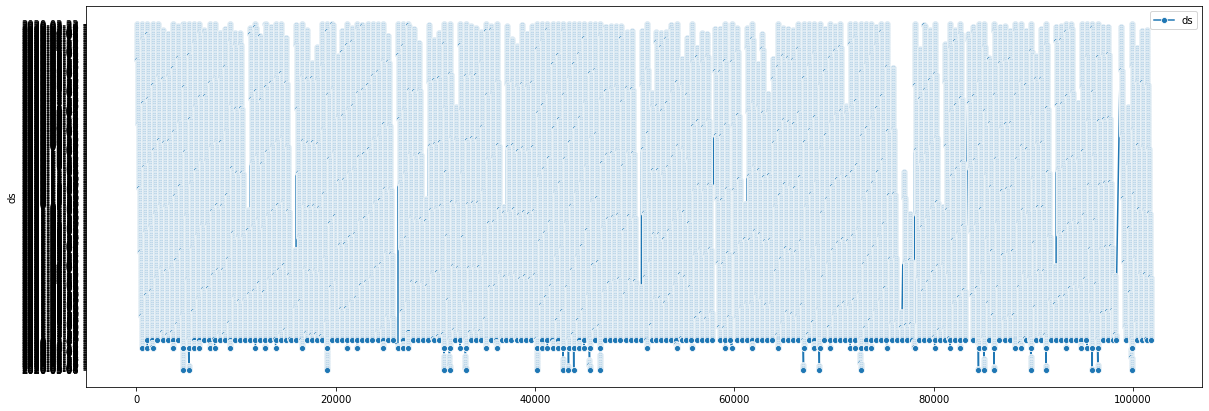

In [133]:
plt.figure(figsize = (20,7))
sns.lineplot(data = df['ds'], label = 'ds', marker = 'o')

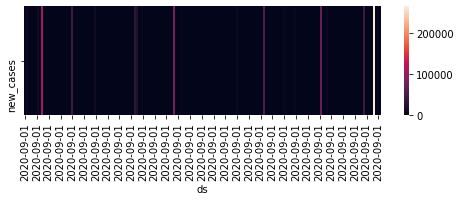

In [150]:
fig, ax = plt.subplots(figsize = (8,2))
cases = df[df['ds'] == '2020-09-01']
ax = sns.heatmap(cases[['ds','new_cases']].set_index('ds').T)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

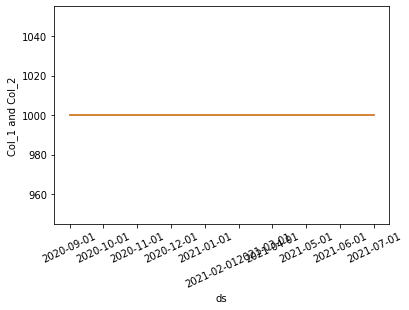

In [161]:
df = pd.DataFrame({'ds': ['2020-09-01', '2020-10-01',
                          '2020-11-01','2020-12-01',
                          '2021-01-01','2021-02-01'
                          '2021-03-01','2021-04-01',
                          '2021-05-01','2021-06-01',
                          '2021-07-01'],
                   'new_cases':[1000,1000,
                                1000,1000,
                                1000,1000,
                                1000,1000,
                                1000,1000,]
                     })

sns.lineplot(x = "ds", y = "new_cases", data = df)
sns.lineplot(x = "ds", y = "new_cases", data = df)
plt.ylabel("Col_1 and Col_2")
plt.xticks(rotation = 25)